In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("data for project.csv", index_col="S/N")
df.head()

,NMC (%),COHESION (kN/m2),ANGLE OF INTERNAL FRICTION (o),LIQUID LIMIT,PLASTIC LIMIT,PLASTICITY INDEX,9.5mm,4.75mm,2.0mm,0.85mm,0.425mm,0.212mm,0.106mm,0.075
S/N,,,,,,,,,,,,,,
1,21.2,48.8,19.2,52,23,29,100,96.5,91.4,86.7,81.9,71.8,52.0,44.8
2,21.0,69.8,20.2,50,22,28,100,97.8,91.4,79.3,66.3,55.4,47.7,45.2
3,25.0,2.2,34.5,32,12,20,100,99.4,95.6,87.3,76.0,56.9,34.4,28.0
4,20.4,22.1,26.8,33,14,19,100,79.9,69.9,58.1,50.3,42.2,33.9,31.1
5,15.0,107.3,24.0,38,12,26,100,81.6,72.3,68.1,66.3,63.9,43.9,33.2


In [8]:
df.describe(include="all").T.style.highlight_max(color="yellow")

,count,mean,std,min,25%,50%,75%,max
NMC (%),38.000000,18.818421,6.928471,8.000000,13.825000,17.950000,24.975000,36.000000
COHESION (kN/m2),38.000000,25.876316,37.140729,0.000000,0.100000,2.200000,60.725000,107.300000
ANGLE OF INTERNAL FRICTION (o),38.000000,31.400000,9.450240,14.000000,21.900000,33.800000,39.750000,47.000000
LIQUID LIMIT,38.000000,14.526316,19.783609,0.000000,0.000000,0.000000,34.500000,52.000000
PLASTIC LIMIT,38.000000,7.078947,9.782449,0.000000,0.000000,0.000000,15.750000,25.000000
PLASTICITY INDEX,38.000000,7.447368,10.373296,0.000000,0.000000,0.000000,17.000000,29.000000
9.5mm,38.000000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4.75mm,38.000000,94.244737,8.914904,60.100000,93.975000,98.200000,99.675000,100.000000
2.0mm,38.000000,87.797368,12.840950,55.700000,78.175000,94.100000,97.500000,100.000000
0.85mm,38.000000,77.852632,20.868996,27.500000,60.600000,87.500000,93.950000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 38
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NMC (%)                         38 non-null     float64
 1   COHESION (kN/m2)                38 non-null     float64
 2   ANGLE OF INTERNAL FRICTION (o)  38 non-null     float64
 3   LIQUID LIMIT                    38 non-null     int64  
 4   PLASTIC LIMIT                   38 non-null     int64  
 5   PLASTICITY INDEX                38 non-null     int64  
 6   9.5mm                           38 non-null     int64  
 7   4.75mm                          38 non-null     float64
 8   2.0mm                           38 non-null     float64
 9   0.85mm                          38 non-null     float64
 10  0.425mm                         38 non-null     float64
 11  0.212mm                         38 non-null     float64
 12  0.106mm                         38 non-null

In [10]:
#Changing some column names to provide beter clarity and understanding of data
col_old=df.columns[6:]
df.rename(columns={col_old[0]:"Sieve size 9.5mm", col_old[1]:"Sieve size 4.75mm", col_old[2]:"Sieve size 2.0mm",
                  col_old[3]:"Sieve size 0.85mm",col_old[4]:"Sieve size 0.425mm", col_old[5]:"Sieve size 0.212mm",
                  col_old[6]:"Sieve size 0.106mm", col_old[7]:"Sieve size 0.075mm"}, inplace=True)
df.head()

,NMC (%),COHESION (kN/m2),ANGLE OF INTERNAL FRICTION (o),LIQUID LIMIT,PLASTIC LIMIT,PLASTICITY INDEX,Sieve size 9.5mm,Sieve size 4.75mm,Sieve size 2.0mm,Sieve size 0.85mm,Sieve size 0.425mm,Sieve size 0.212mm,Sieve size 0.106mm,Sieve size 0.075mm
S/N,,,,,,,,,,,,,,
1,21.2,48.8,19.2,52,23,29,100,96.5,91.4,86.7,81.9,71.8,52.0,44.8
2,21.0,69.8,20.2,50,22,28,100,97.8,91.4,79.3,66.3,55.4,47.7,45.2
3,25.0,2.2,34.5,32,12,20,100,99.4,95.6,87.3,76.0,56.9,34.4,28.0
4,20.4,22.1,26.8,33,14,19,100,79.9,69.9,58.1,50.3,42.2,33.9,31.1
5,15.0,107.3,24.0,38,12,26,100,81.6,72.3,68.1,66.3,63.9,43.9,33.2


#  VISUALIZING OUR DATA

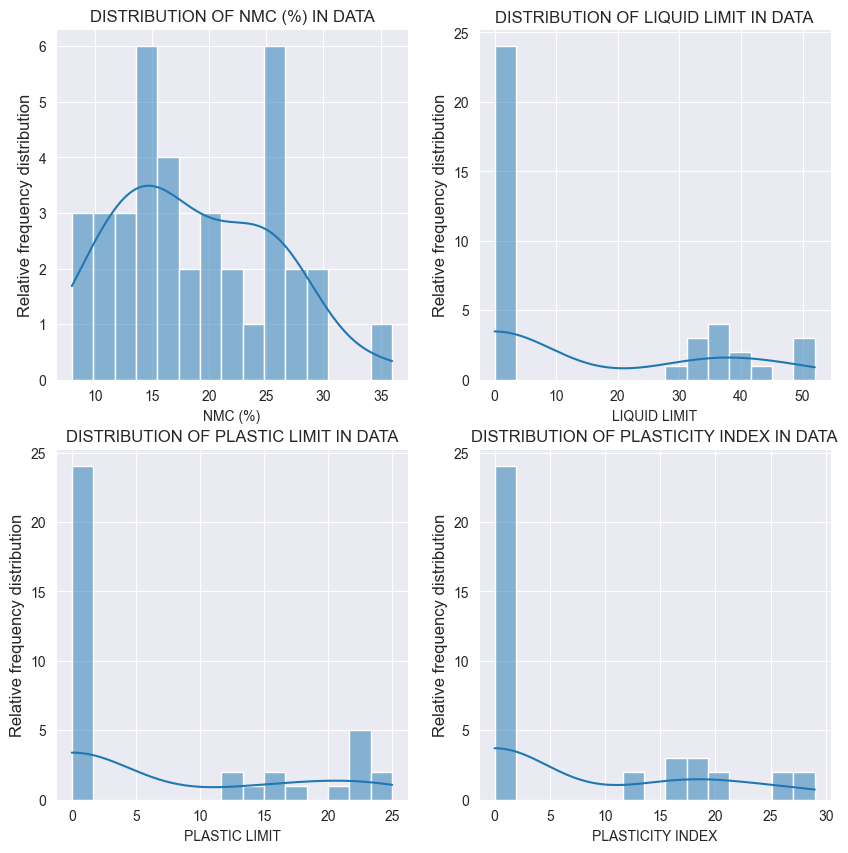

In [9]:
#plotting an histogram and density plot combined for some of the independent variables
plot_col1=df.columns.to_list()[:6]
plot_col1.remove("ANGLE OF INTERNAL FRICTION (o)")
plot_col1.remove("COHESION (kN/m2)")
sns.set_style("darkgrid")
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
axes=[ax1,ax2,ax3,ax4]
for col, ax in zip(plot_col1, range(len(axes))):
    sns.histplot(df[col], ax=axes[ax], kde=True,  bins=15)
    axes[ax].set_ylabel(f'Relative frequency distribution', fontsize="12")
    axes[ax].set_title(f'DISTRIBUTION OF {col} IN DATA')
    sns.despine()
    

Most of the dependent variables visualized here are rightly skewed although the skewness is still with moderate boundaries and as such, there would be no need for transformations

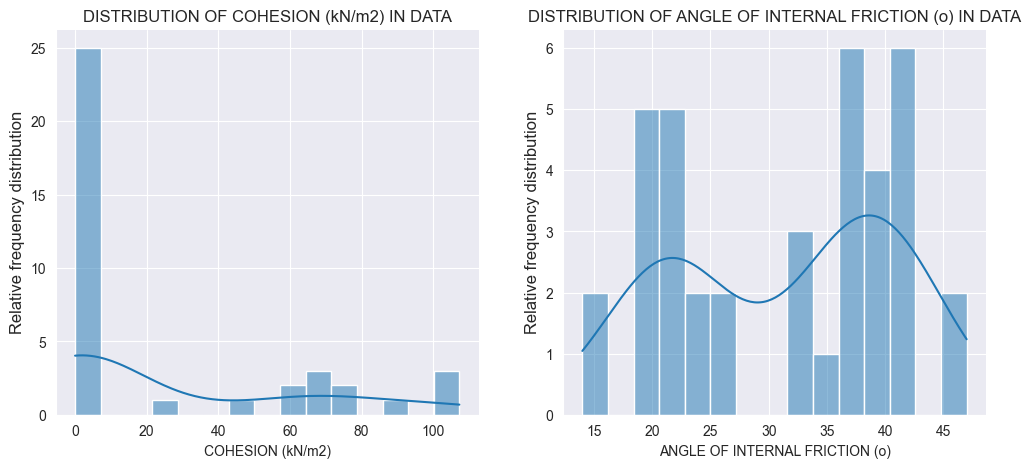

In [10]:
#plotting an histogram and density plot combined for the dependent variables
plot_col2=df.columns.to_list()[1:3]
sns.set_style("darkgrid")
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
axes=[ax1,ax2]
for col, ax in zip(plot_col2, range(len(axes))):
    sns.histplot(df[col], ax=axes[ax], kde=True,  bins=15)
    axes[ax].set_ylabel(f'Relative frequency distribution', fontsize="12")
    axes[ax].set_title(f'DISTRIBUTION OF {col} IN DATA')
    sns.despine()
    

The Cohesion seems to demonstate some level of skewness, we can check to ascertain if the skewness is acceptable and moderate or if we have to apply log transformation

In [11]:
df["COHESION (kN/m2)"].skew()

1.0885821474586115

Its considered moderate and as such there would be no need for log transformation

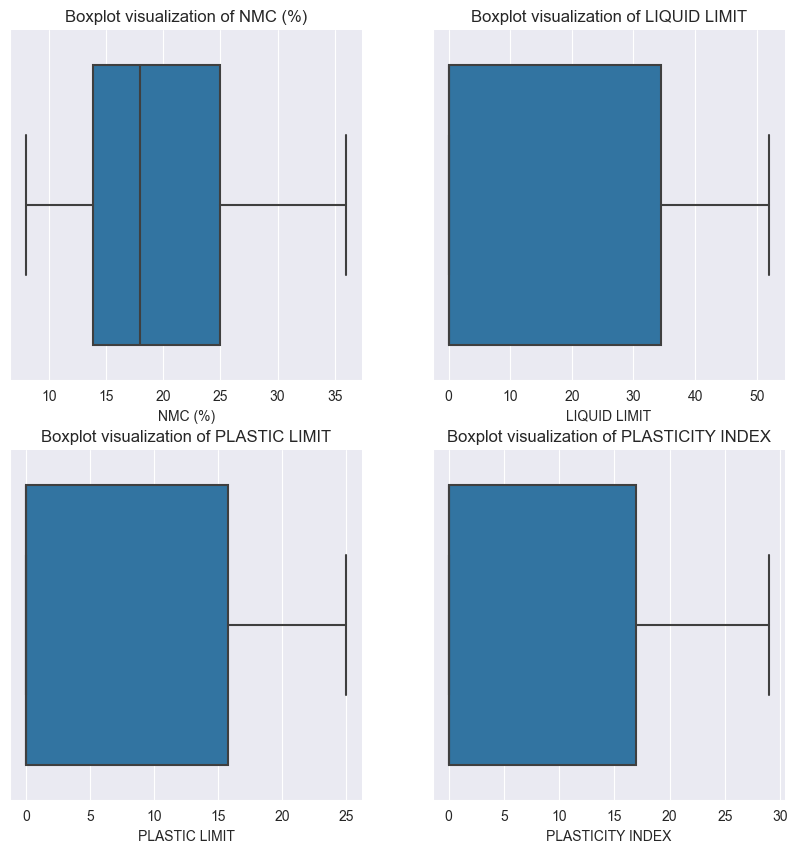

In [12]:
sns.set_style("darkgrid")
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
axes=[ax1,ax2,ax3,ax4]
for col, ax in zip(plot_col1, range(len(axes))):
    sns.boxplot(x=df[col], ax=axes[ax])
    axes[ax].set_title(f'Boxplot visualization of {col}')
    sns.despine()


The boxplot further shows that most of the dependent variables are positively skewed although the skewness is still within moderate bounds and as such there would be no need to apply any transformation. Also, there are no prescence of outliers in our data as visualized

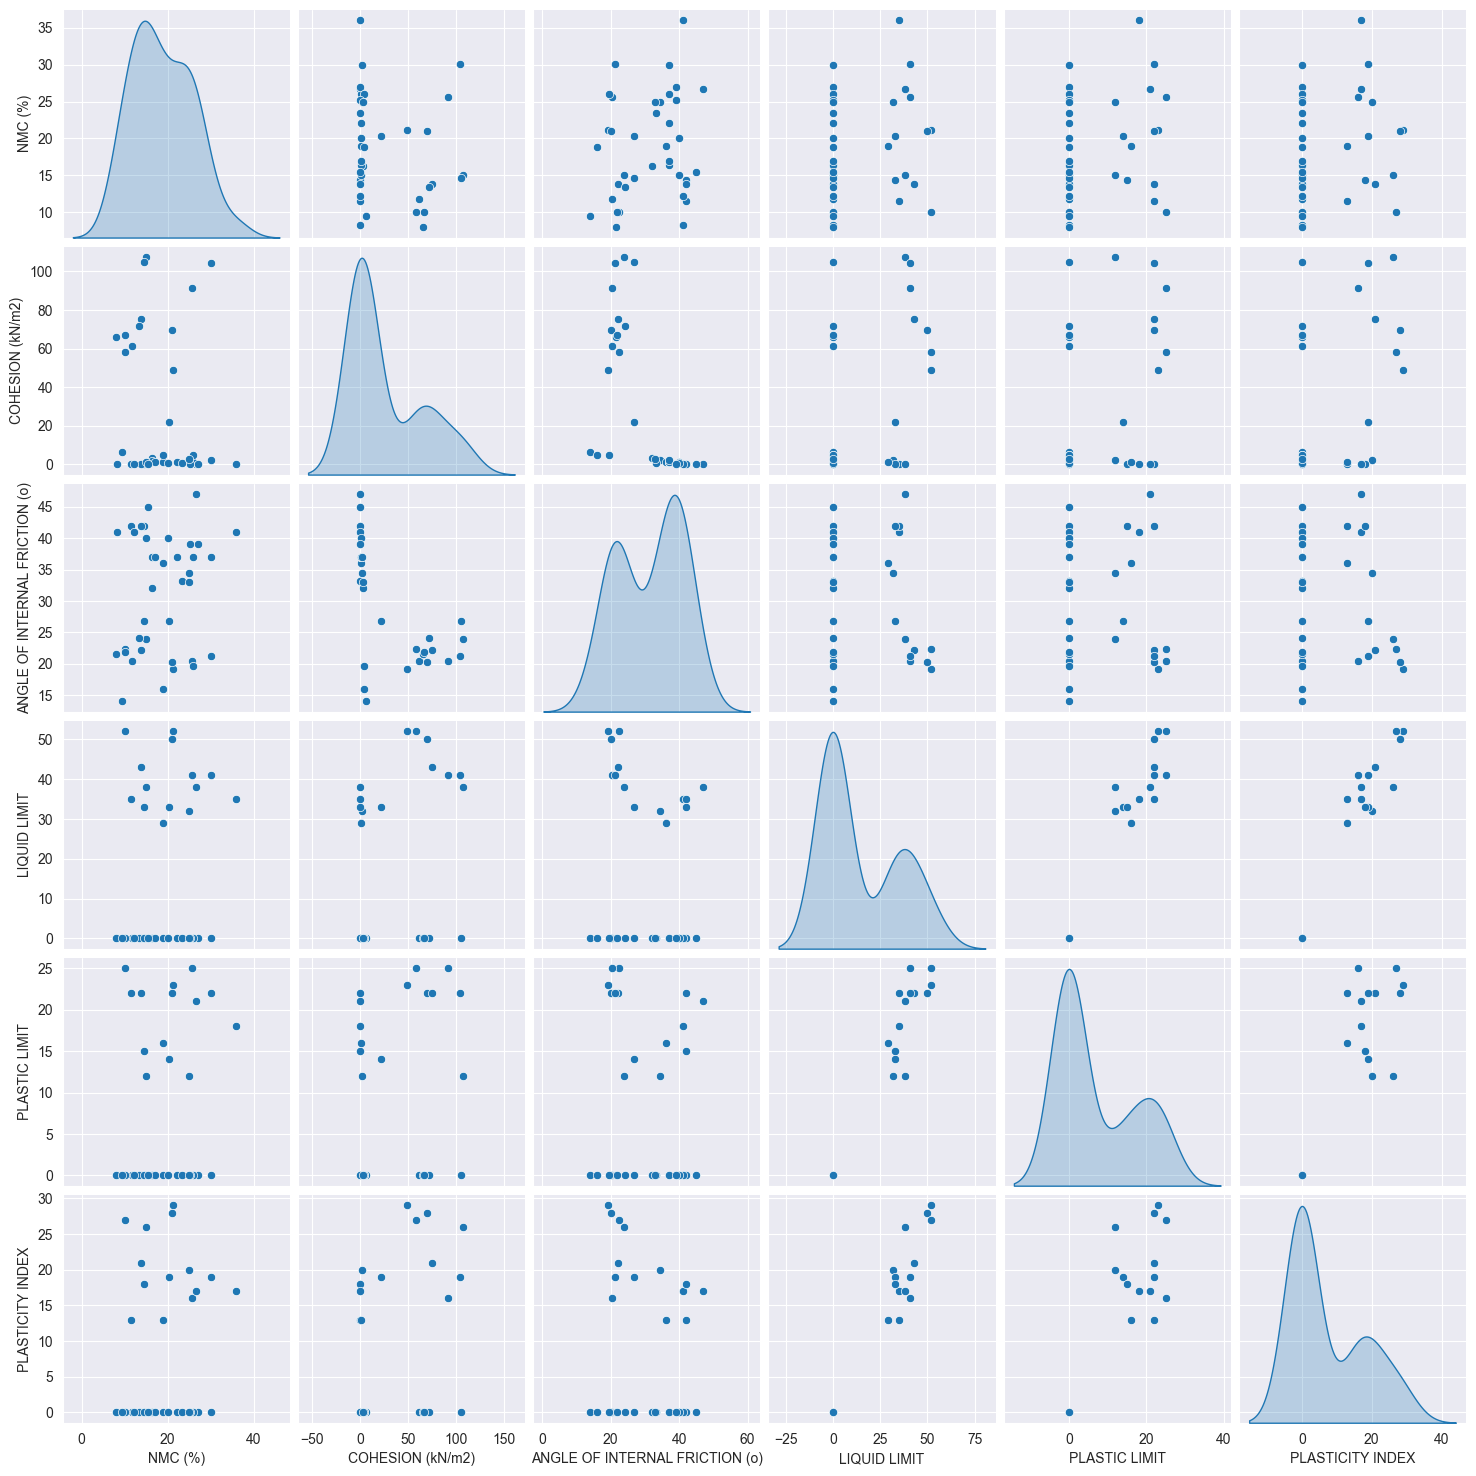

In [13]:
col_req=df.iloc[:,:6]
_=sns.pairplot(col_req, kind="scatter", diag_kind="kde")

In [14]:
correl1=abs(col_req.corr()["COHESION (kN/m2)"]).sort_values(ascending=False)
correl2=abs(col_req.corr()["ANGLE OF INTERNAL FRICTION (o)"]).sort_values(ascending=False)

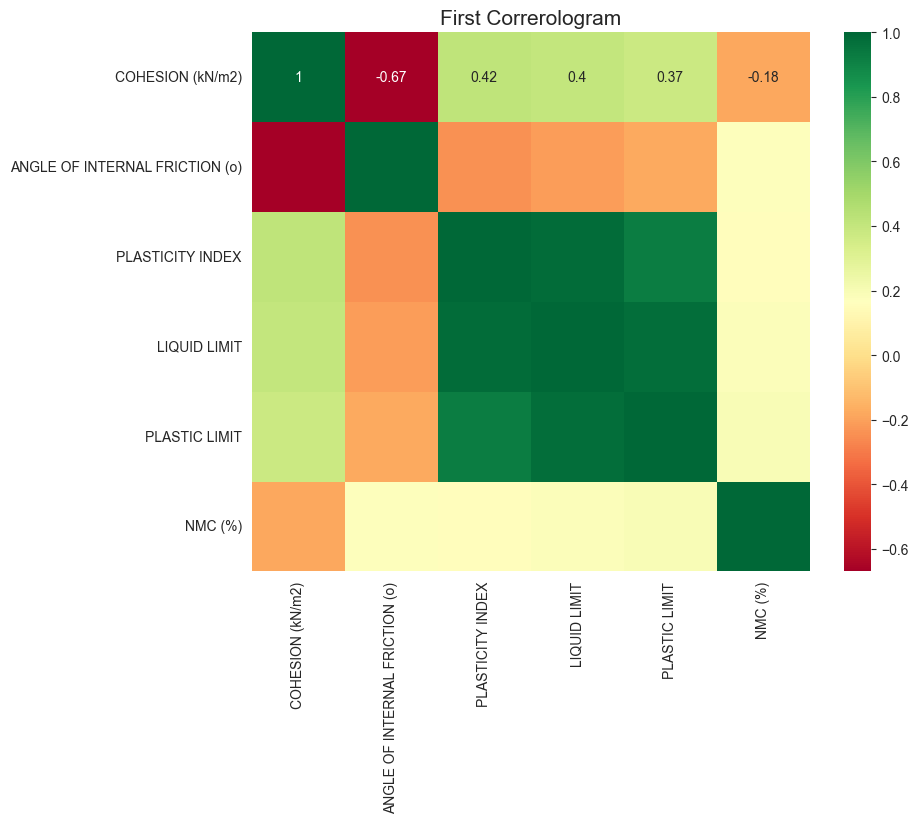

In [15]:
corr1=df[list(correl1.index)].corr()
plt.figure(figsize=(9,7))
_=sns.heatmap(corr1, cmap='RdYlGn', annot=True)
_=plt.title("First Correrologram", fontsize=15)

The Angle of friction has the highest negative correlation of -0.67 with Cohesion  while Platicity index has the highest positive correlation of 0.42 with the Cohesion

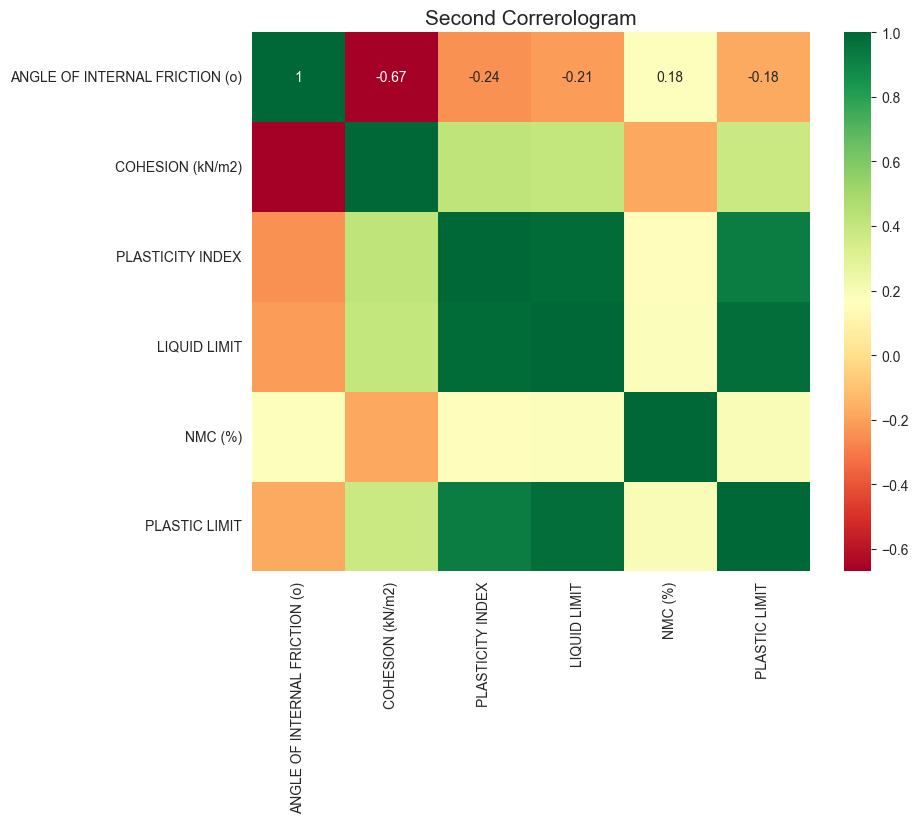

In [16]:
corr2=df[list(correl2.index)].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr2, cmap='RdYlGn', annot=True)
_=plt.title("Second Correrologram", fontsize=15)

Cohesion has the highest negative correlation of -0.67 with the Angle of friction while Natural moisture content has the highest positive correlation of 0.18 with the Angle of Friction

# BUILDING MODEL FOR PREDICTION OF COHESION

In [11]:
X=df.drop(["COHESION (kN/m2)", "ANGLE OF INTERNAL FRICTION (o)"], axis=1)
y=df["COHESION (kN/m2)"]
X.head()

,NMC (%),LIQUID LIMIT,PLASTIC LIMIT,PLASTICITY INDEX,Sieve size 9.5mm,Sieve size 4.75mm,Sieve size 2.0mm,Sieve size 0.85mm,Sieve size 0.425mm,Sieve size 0.212mm,Sieve size 0.106mm,Sieve size 0.075mm
S/N,,,,,,,,,,,,
1,21.2,52,23,29,100,96.5,91.4,86.7,81.9,71.8,52.0,44.8
2,21.0,50,22,28,100,97.8,91.4,79.3,66.3,55.4,47.7,45.2
3,25.0,32,12,20,100,99.4,95.6,87.3,76.0,56.9,34.4,28.0
4,20.4,33,14,19,100,79.9,69.9,58.1,50.3,42.2,33.9,31.1
5,15.0,38,12,26,100,81.6,72.3,68.1,66.3,63.9,43.9,33.2


In [12]:
#sorted(sklearn.metrics.SCORERS.keys())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### LINEAR REGRESSION MODEL

In [43]:
#Building the first model to predict Cohesion
import math
linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred=linreg.predict(X_test_scaled)
rmse =round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
r2=round(r2_score(y_test, y_pred),3)
print(f"The root mean squared error for this linear regression model is {rmse}\nThe r2 score for the linear regression model is {r2}")

The root mean squared error for this linear regression model is 33.547
The r2 score for the linear regression model is 0.393


#### POLYNOMIAL REGRESSION MODEL

In [46]:
# Defining the degree range for polynomial features
degree_range = [1,2,3,4,5]

# Create the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=degree_range)

# Create the linear regression model with L1 regularization
model = Lasso(alpha=0.1)  # Adjust the L1_ratio for regularization strength

# Define the parameter grid for GridSearchCV
param_grid = {
    "poly__degree": degree_range,
    "model__alpha": [0.01, 0.1, 1.0, 10]  # Experiment with different L1_ratio values
}

# Create the pipeline
pipe = Pipeline(
    steps=[("scaler", scaler), ("poly", poly), ("model", model)]
)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Evaluate the model performance (e.g., using mean squared error)
# ...

print(f"Best Model Parameters: {best_params}")
# ... (Print prediction results or evaluation metrics)

Best Model Parameters: {'model__alpha': 1.0, 'poly__degree': 1}


In [55]:
degree = 1
alpha = 1

poly = PolynomialFeatures(degree=degree) 
model = Lasso(alpha=alpha)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

34.0397585005303

#### DECISION TREE MODEL

In [44]:
tree_model = DecisionTreeRegressor(random_state=1)

max_depths = range(1,5)
param_grid = {'max_depth' : max_depths}
grid_model = GridSearchCV(tree_model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_model.fit(X_train_scaled, y_train)
grid_model.best_params_

{'max_depth': 1}

In [45]:
tree_model = DecisionTreeRegressor(max_depth=1, random_state=1)
tree_model.fit(X_train_scaled, y_train)
y_pred = tree_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

64.28382410840227

#### NEURAL NETWORK MODEL

In [18]:
## Create the random forest regressor object
mlp = MLPRegressor()

# Define the parameter space for hyperparameter tuning
param_dist = {"activation":["relu","tanh","linear"],
             "solver":["lbfgs","adam","sgd"],"alpha":np.arange(20)}

# Create the halving random search cross-validation object and fit 
hrscv = GridSearchCV(mlp, param_grid=param_dist, scoring="r2",cv=5, n_jobs= -1)
hrscv.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters for Random Forest Regressor: {hrscv.best_params_}")
print(f"Best hyperparameters for Random Forest Regressor: {hrscv.best_score_}")
pd.DataFrame(hrscv.cv_results_)[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head()

Best hyperparameters for Random Forest Regressor: {'activation': 'tanh', 'alpha': 1, 'solver': 'adam'}
Best hyperparameters for Random Forest Regressor: -22.065699276811596


,params,mean_test_score
64,"{'activation': 'tanh', 'alpha': 1, 'solver': '...",-22.065699
94,"{'activation': 'tanh', 'alpha': 11, 'solver': ...",-23.554829
97,"{'activation': 'tanh', 'alpha': 12, 'solver': ...",-24.451315
79,"{'activation': 'tanh', 'alpha': 6, 'solver': '...",-24.882160
103,"{'activation': 'tanh', 'alpha': 14, 'solver': ...",-25.608041


In [19]:
mlpreg = MLPRegressor(hidden_layer_sizes = [7,4], activation = "tanh",alpha = 7, solver = 'lbfgs',random_state=9)
mlpreg.fit(X_train, y_train)
y_predict_output = mlpreg.predict(X_test_scaled)
rmse = round(math.sqrt(mean_squared_error(y_test, y_predict_output)),3)
r2=round(r2_score(y_test, y_predict_output),3)
print(f"The root mean squared error for this neural network model is {rmse}\nThe r2 score for the neural netwok model is {r2}")

The root mean squared error for this neural network model is 44.083
The r2 score for the neural netwok model is -0.318


The neural network model built to predict the Cohesion performs way better than the linear regression model, the results of both statistical indicators used to evaluate model performance: root mean squared error and r2 score for the neural network yield better results as compared to that of the linear regression model

# BUILDING MODEL FOR PREDICTION OF ANGLE OF INTERNAL FRICTION

In [57]:
Xf=df.drop(["ANGLE OF INTERNAL FRICTION (o)"], axis=1)
yf=df["ANGLE OF INTERNAL FRICTION (o)"]
Xf.head()

,NMC (%),COHESION (kN/m2),LIQUID LIMIT,PLASTIC LIMIT,PLASTICITY INDEX,Sieve size 9.5mm,Sieve size 4.75mm,Sieve size 2.0mm,Sieve size 0.85mm,Sieve size 0.425mm,Sieve size 0.212mm,Sieve size 0.106mm,Sieve size 0.075mm
S/N,,,,,,,,,,,,,
1,21.2,48.8,52,23,29,100,96.5,91.4,86.7,81.9,71.8,52.0,44.8
2,21.0,69.8,50,22,28,100,97.8,91.4,79.3,66.3,55.4,47.7,45.2
3,25.0,2.2,32,12,20,100,99.4,95.6,87.3,76.0,56.9,34.4,28.0
4,20.4,22.1,33,14,19,100,79.9,69.9,58.1,50.3,42.2,33.9,31.1
5,15.0,107.3,38,12,26,100,81.6,72.3,68.1,66.3,63.9,43.9,33.2


In [58]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=0)
scaler=MinMaxScaler()
Xf_train_scaled=scaler.fit_transform(Xf_train)
Xf_test_scaled=scaler.transform(Xf_test)

#### LINEAR REGRESSION MODEL

In [59]:
linreg=LinearRegression()
linreg.fit(Xf_train_scaled, yf_train)
yf_pred=linreg.predict(Xf_test_scaled)
rmse = round(math.sqrt(mean_squared_error(yf_test, yf_pred)),3)
r2=round(r2_score(yf_test, yf_pred),3)
print(f"The root mean squared error for this linear regression model is {rmse}\nThe r2 score for the linear regression model is {r2}")

The root mean squared error for this linear regression model is 7.933
The r2 score for the linear regression model is 0.288


#### POLYNOMIAL REGRESSION MODEL

In [60]:
# Defining the degree range for polynomial features
degree_range = range(1, 4)

# Create the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=degree_range)

# Create the linear regression model with L1 regularization
model = Lasso(alpha=0.1)  # Adjust the L1_ratio for regularization strength

# Define the parameter grid for GridSearchCV
param_grid = {
    "poly__degree": degree_range,
    "model__alpha": [0.01, 0.1, 1.0, 10]  # Experiment with different L1_ratio values
}

# Create the pipeline
pipe = Pipeline(
    steps=[("scaler", scaler), ("poly", poly), ("model", model)]
)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the grid search to the data
grid_search.fit(Xf_train, yf_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
predictions = best_model.predict(Xf_test)

# Evaluate the model performance (e.g., using mean squared error)
# ...

print(f"Best Model Parameters: {best_params}")
# ... (Print prediction results or evaluation metrics)

Best Model Parameters: {'model__alpha': 1.0, 'poly__degree': 1}


#### DECISION TREE MODEL

In [61]:
tree_model = DecisionTreeRegressor(random_state=1)

max_depths = range(1,5)
param_grid = {'max_depth' : max_depths}
grid_model = GridSearchCV(tree_model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_model.fit(Xf_train_scaled, yf_train)
grid_model.best_params_

{'max_depth': 3}

In [62]:
tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_model.fit(Xf_train_scaled, yf_train)
y_pred = tree_model.predict(Xf_test)
rmse = np.sqrt(mean_squared_error(yf_test, yf_pred))
rmse

7.932984665652013

#### NEURAL NETWORK MODEL

In [23]:
## Create the random forest regressor object
mlp = MLPRegressor()

# Define the parameter space for hyperparameter tuning
param_dist = {"activation":["relu","tanh","linear"],
             "solver":["lbfgs","adam","sgd"],"alpha":np.arange(20)}

# Create the halving random search cross-validation object and fit 
hrscv = GridSearchCV(mlp, param_grid=param_dist, scoring="r2",
                     cv=5, n_jobs= -1)
hrscv.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters for Random Forest Regressor: {hrscv.best_params_}")
print(f"Best hyperparameters for Random Forest Regressor: {hrscv.best_score_}")
pd.DataFrame(hrscv.cv_results_)[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head()

Best hyperparameters for Random Forest Regressor: {'activation': 'relu', 'alpha': 1, 'solver': 'adam'}
Best hyperparameters for Random Forest Regressor: 0.12361242991672898


,params,mean_test_score
4,"{'activation': 'relu', 'alpha': 1, 'solver': '...",0.123612
16,"{'activation': 'relu', 'alpha': 5, 'solver': '...",0.004442
63,"{'activation': 'tanh', 'alpha': 1, 'solver': '...",-0.023266
40,"{'activation': 'relu', 'alpha': 13, 'solver': ...",-0.381102
31,"{'activation': 'relu', 'alpha': 10, 'solver': ...",-0.475503


The neural network model built to predict the angle of internal friction also performs way better than the linear regression model, the results of both statistical indicators used to evaluate model performance: root mean squared error and r2 score for the neural network yield better results as compared to that of the linear regression model

Therefore, it is safe to conclude that of two algorithms proposed for developing our models, the neural network performs better from the results of the statistical indicators used to evaluate model performance

Also, the prediction results show that the neural network algorithm performs better when predicting the angle of internal friction than it does when predicting the Cohesion.